In [2]:
import pandas as pd 
import pickle
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
creator.create("obj", base.Fitness, weights=(1.0,))
creator.create("Ind", list, fitness=creator.obj)

In [4]:
experiments = 40
checkpoint_files = {}
for i in range(experiments):
    with open("coarse_search_"+str(i)+"/checkpoint.pkl", "rb") as cp_file:
        checkpoint_files[i] = pickle.load(cp_file)

In [5]:
def get_ind_list(pop_list, index):
    ind_list = [] 
    for pop in pop_list:
        ind_list.append(pop[index])
    return ind_list

In [6]:
keff_results = {"max":[], "ave":[], "min":[]} 
for i in range(experiments):
    logbook = checkpoint_files[i]["logbook"]
    keff_results["max"].append(get_ind_list(logbook.chapters["oup"].select("max"), 0)[-1])
    keff_results["ave"].append(get_ind_list(logbook.chapters["oup"].select("avg"), 0)[-1])
    keff_results["min"].append(get_ind_list(logbook.chapters["oup"].select("min"), 0)[-1])

In [7]:
df = pd.read_csv("coarse_search_hyperparameters.csv", index_col="experiment_num")

In [8]:
df["keff_max"] = keff_results["max"]
df["keff_min"] = keff_results["min"]
df["keff_ave"] = keff_results["ave"]

In [9]:
df

,pop_size,gens,mut_prob,mate_prob,select_op,k,tournsize,mut_op,mate_op,keff_max,keff_min,keff_ave
experiment_num,,,,,,,,,,,,
0,21,29,0.157617,0.527051,selTournament,13,7.0,mutPolynomialBounded,cxOnePoint,1.384956,1.362970,1.383857
1,63,10,0.166172,0.513330,selNSGA2,22,NaN,mutPolynomialBounded,cxBlend,1.401756,1.350496,1.384468
2,93,7,0.296026,0.277389,selTournament,42,8.0,mutPolynomialBounded,cxBlend,1.404492,1.339556,1.386615
3,67,9,0.177595,0.400426,selTournament,23,4.0,mutPolynomialBounded,cxBlend,1.403372,1.353902,1.382710
4,87,7,0.276113,0.217605,selBest,40,NaN,mutPolynomialBounded,cxOnePoint,1.393198,1.340794,1.383842
5,64,10,0.109872,0.372388,selTournament,21,3.0,mutPolynomialBounded,cxUniform,1.399602,1.363357,1.393879
6,83,8,0.326200,0.175023,selTournament,38,7.0,mutPolynomialBounded,cxOnePoint,1.409540,1.343471,1.398762
7,43,14,0.299562,0.446814,selBest,17,NaN,mutPolynomialBounded,cxBlend,1.405487,1.340363,1.392486
8,86,7,0.308425,0.470644,selTournament,33,2.0,mutPolynomialBounded,cxOnePoint,1.399535,1.337937,1.378824


In [10]:
df[df["keff_ave"] > 1.39820]

,pop_size,gens,mut_prob,mate_prob,select_op,k,tournsize,mut_op,mate_op,keff_max,keff_min,keff_ave
experiment_num,,,,,,,,,,,,
6,83,8,0.326200,0.175023,selTournament,38,7.0,mutPolynomialBounded,cxOnePoint,1.409540,1.343471,1.398762
15,28,22,0.262139,0.539865,selTournament,14,5.0,mutPolynomialBounded,cxOnePoint,1.404400,1.362865,1.401757
24,74,9,0.219447,0.486804,selBest,25,NaN,mutPolynomialBounded,cxUniform,1.403651,1.352768,1.401184
36,60,10,0.236310,0.598343,selTournament,15,5.0,mutPolynomialBounded,cxBlend,1.405900,1.342750,1.399061
39,60,10,0.237413,0.469913,selTournament,15,5.0,mutPolynomialBounded,cxBlend,1.405199,1.353011,1.401659


6 [1.9936644988155723, 0.05795161704336238, 3.5715969163602765]
15 [1.9988232864874895, 0.3673609186089894, 3.022347908347551]
24 [1.9990828526577367, 0.32057688360682524, 3.615514837508756]
36 [1.9975906010083915, 0.3397404931748585, 3.0538105497482104]
39 [1.9895473963329304, 0.35471324747146116, 3.143640952051353]


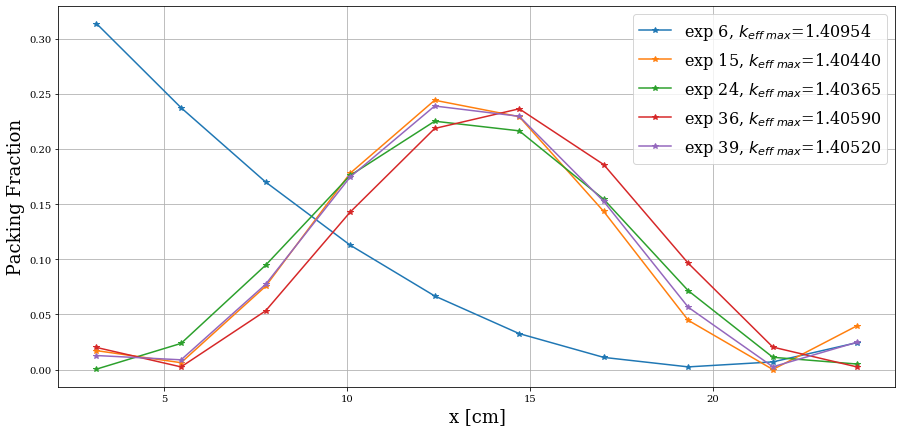

In [20]:
def get_ind_list(pop_list, index):
    ind_list = [] 
    for pop in pop_list:
        ind_list.append(pop[index])
    return ind_list
T_pitch = 0.09266
vol_total = 23.1 * 2.55 * T_pitch * 20
vol_triso = 4 / 3 * np.pi * 4235e-5 ** 3
no_trisos = 0.0979 * vol_total / vol_triso
vol_slice = 2.31 * 2.55 * T_pitch * 20
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(15,7))
colors = 2*["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "tab:blue","tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
boundaries = np.arange(2,27.1,2.31)
midpoints = [] 
for x in range(len(boundaries)-1):
    midpoints.append((boundaries[x]+boundaries[x+1])/2)
midpoints = np.array(midpoints)
x = midpoints
c = 0
for i in range(experiments):
    if i in list(np.argsort(df["keff_ave"]))[35:]:
        keff_max = checkpoint_files[i]["all"]["outputs"][-1]
        max_value = max(keff_max, key = lambda t: t[0])
        max_index = keff_max.index(max_value)
        final_pop = checkpoint_files[i]["all"]["populations"][-1]
        for j, ind in enumerate(final_pop):
            if j == max_index:
                print(i, ind)
                sine = ind[0] * np.sin(ind[1]*x + ind[2]) + 2
                sine = sine / sum(sine) * no_trisos * vol_triso / vol_slice
                ax.plot(midpoints, sine, marker='*', color=colors[c],label="exp "+str(i) + r", $k_{eff\ max}$=" + "{:.5f}".format(max_value[0]))
                c += 1
                #ax.text(midpoints[-1]+0.7, sine[-1], "%f" %max_value, ha="center")
                #ax.text(midpoints[-1]+2, sine[-1], "%d" %i, ha="center")
ax.grid()
ax.set_xlabel("x [cm]", fontsize=18)
ax.set_ylabel(" Packing Fraction ", fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=16)
fig.savefig('topfive_plot.png',bbox_inches='tight', dpi=300)

In [12]:
df

,pop_size,gens,mut_prob,mate_prob,select_op,k,tournsize,mut_op,mate_op,keff_max,keff_min,keff_ave
experiment_num,,,,,,,,,,,,
0,21,29,0.157617,0.527051,selTournament,13,7.0,mutPolynomialBounded,cxOnePoint,1.384956,1.362970,1.383857
1,63,10,0.166172,0.513330,selNSGA2,22,NaN,mutPolynomialBounded,cxBlend,1.401756,1.350496,1.384468
2,93,7,0.296026,0.277389,selTournament,42,8.0,mutPolynomialBounded,cxBlend,1.404492,1.339556,1.386615
3,67,9,0.177595,0.400426,selTournament,23,4.0,mutPolynomialBounded,cxBlend,1.403372,1.353902,1.382710
4,87,7,0.276113,0.217605,selBest,40,NaN,mutPolynomialBounded,cxOnePoint,1.393198,1.340794,1.383842
5,64,10,0.109872,0.372388,selTournament,21,3.0,mutPolynomialBounded,cxUniform,1.399602,1.363357,1.393879
6,83,8,0.326200,0.175023,selTournament,38,7.0,mutPolynomialBounded,cxOnePoint,1.409540,1.343471,1.398762
7,43,14,0.299562,0.446814,selBest,17,NaN,mutPolynomialBounded,cxBlend,1.405487,1.340363,1.392486
8,86,7,0.308425,0.470644,selTournament,33,2.0,mutPolynomialBounded,cxOnePoint,1.399535,1.337937,1.378824


In [13]:
def comparison(x,y,ax):
    fine = 25
    size = (df["keff_ave"]- np.min(df["keff_ave"]))#**4*2e9
    size = (df["keff_ave"])
    #im = ax.scatter(df[x][:fine], df[y][:fine], c=size[:fine],alpha=.7, cmap='viridis')#s=size[:fine],edgecolors='k',alpha=.7)
    #im = ax.scatter(df[x][fine:], df[y][fine:], c=size[fine:],alpha=1, cmap='viridis')#s=size[fine:],edgecolors='k',alpha=.7)
    #img = ax.scatter(df[x][:fine], df[y][:fine], c=size[fine:],alpha=1, cmap='viridis')
    img = ax.scatter(df[x][:fine], df[y][:fine], c=size[:fine],alpha=0.6, cmap='cividis', s=90,edgecolors='k')
    if x == "select_op":
        ax.set_xticklabels(["selTournament", "selNSGA2", "selBest"])
    ax.grid()
    #ax.set_facecolor('lightgrey')
    return img

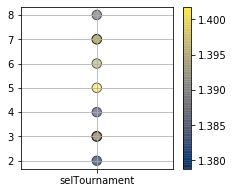

In [14]:
fig = plt.figure(figsize=(28, 28))
ax = fig.add_subplot(8.5,7,1)
img = comparison("select_op", "tournsize", ax)
fig.colorbar(img)

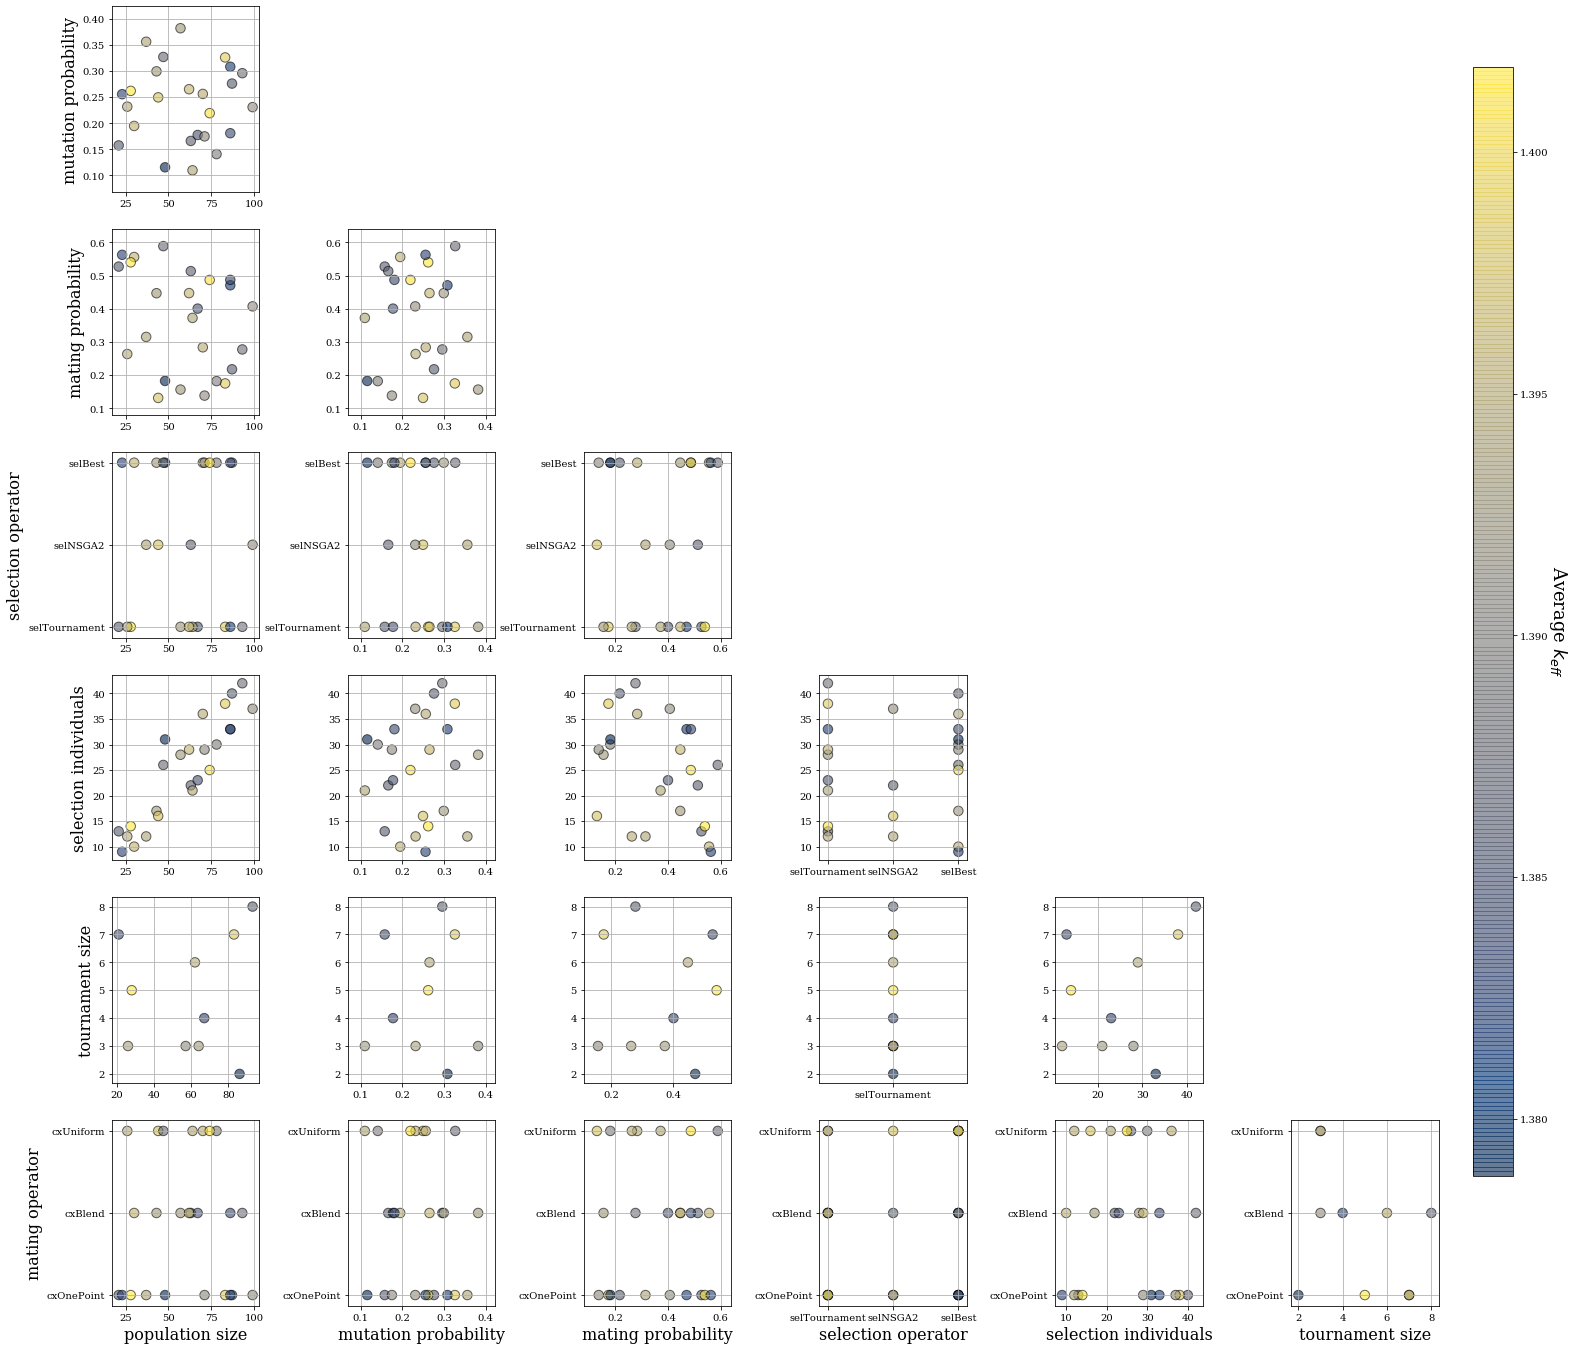

In [16]:
hyperparameters = ["pop_size", "mut_prob", "mate_prob", "select_op", "k", "tournsize", "mate_op"]
names = ["population size", "mutation probability", "mating probability", "selection operator", "selection individuals", "tournament size", "mating operator"]
plt.rc('font', family='serif')
fig = plt.figure(figsize=(28, 28))
num = 0
for i, p in enumerate(hyperparameters):
    for j, q in enumerate(hyperparameters):
        if i > 0:
            num += 1
            if j < i:
                ax = fig.add_subplot(7,7,num)
                img = comparison(q,p,ax)
            if j == 0:
                ax.set_ylabel(names[i],fontsize=16)
            if i == len(hyperparameters) - 1 and j < len(hyperparameters) - 1: 
                ax.set_xlabel(names[j], fontsize=16)
cbar_ax = fig.add_axes([0.8, 0.3, 0.02, 0.55])
cbar = fig.colorbar(img, cax=cbar_ax)
cbar.ax.set_ylabel('Average $k_{eff}$', rotation=270, fontsize=18)
cbar.ax.get_yaxis().labelpad = 20
fig.subplots_adjust(wspace=.6)
fig.savefig('hyperparameter_sens.png',bbox_inches='tight', dpi=300)

In [17]:
values = {} 
values["a"], values["b"], values["c"], values["keff_max"], values["keff_ave"] = [], [], [], [], []
for j in range(experiments):
    results = checkpoint_files[j]["all"]
    keffs = results["outputs"][-1]
    pop = results["populations"][-1]
    max_value = max(keffs, key = lambda t: t[0])
    max_index = keffs.index(max_value)
    values["a"].append(pop[max_index][0])
    values["b"].append(pop[max_index][1])
    values["c"].append(pop[max_index][2])
    values["keff_max"].append(max_value)
    values["keff_ave"].append(np.mean(keffs))

In [18]:
def comparison2(x,y,ax):
    fine = 25
    ax.scatter(df[x][:fine], values[y][:fine], c=df["keff_ave"][:fine],alpha=0.5, cmap='cividis', s=90,edgecolors='k')
    ax.scatter(df[x][fine:], values[y][fine:], c=df["keff_ave"][fine:], alpha=1., cmap='cividis', s=90,edgecolors='k')
    ax.grid()
    #ax.set_facecolor('lightgrey')
    return img

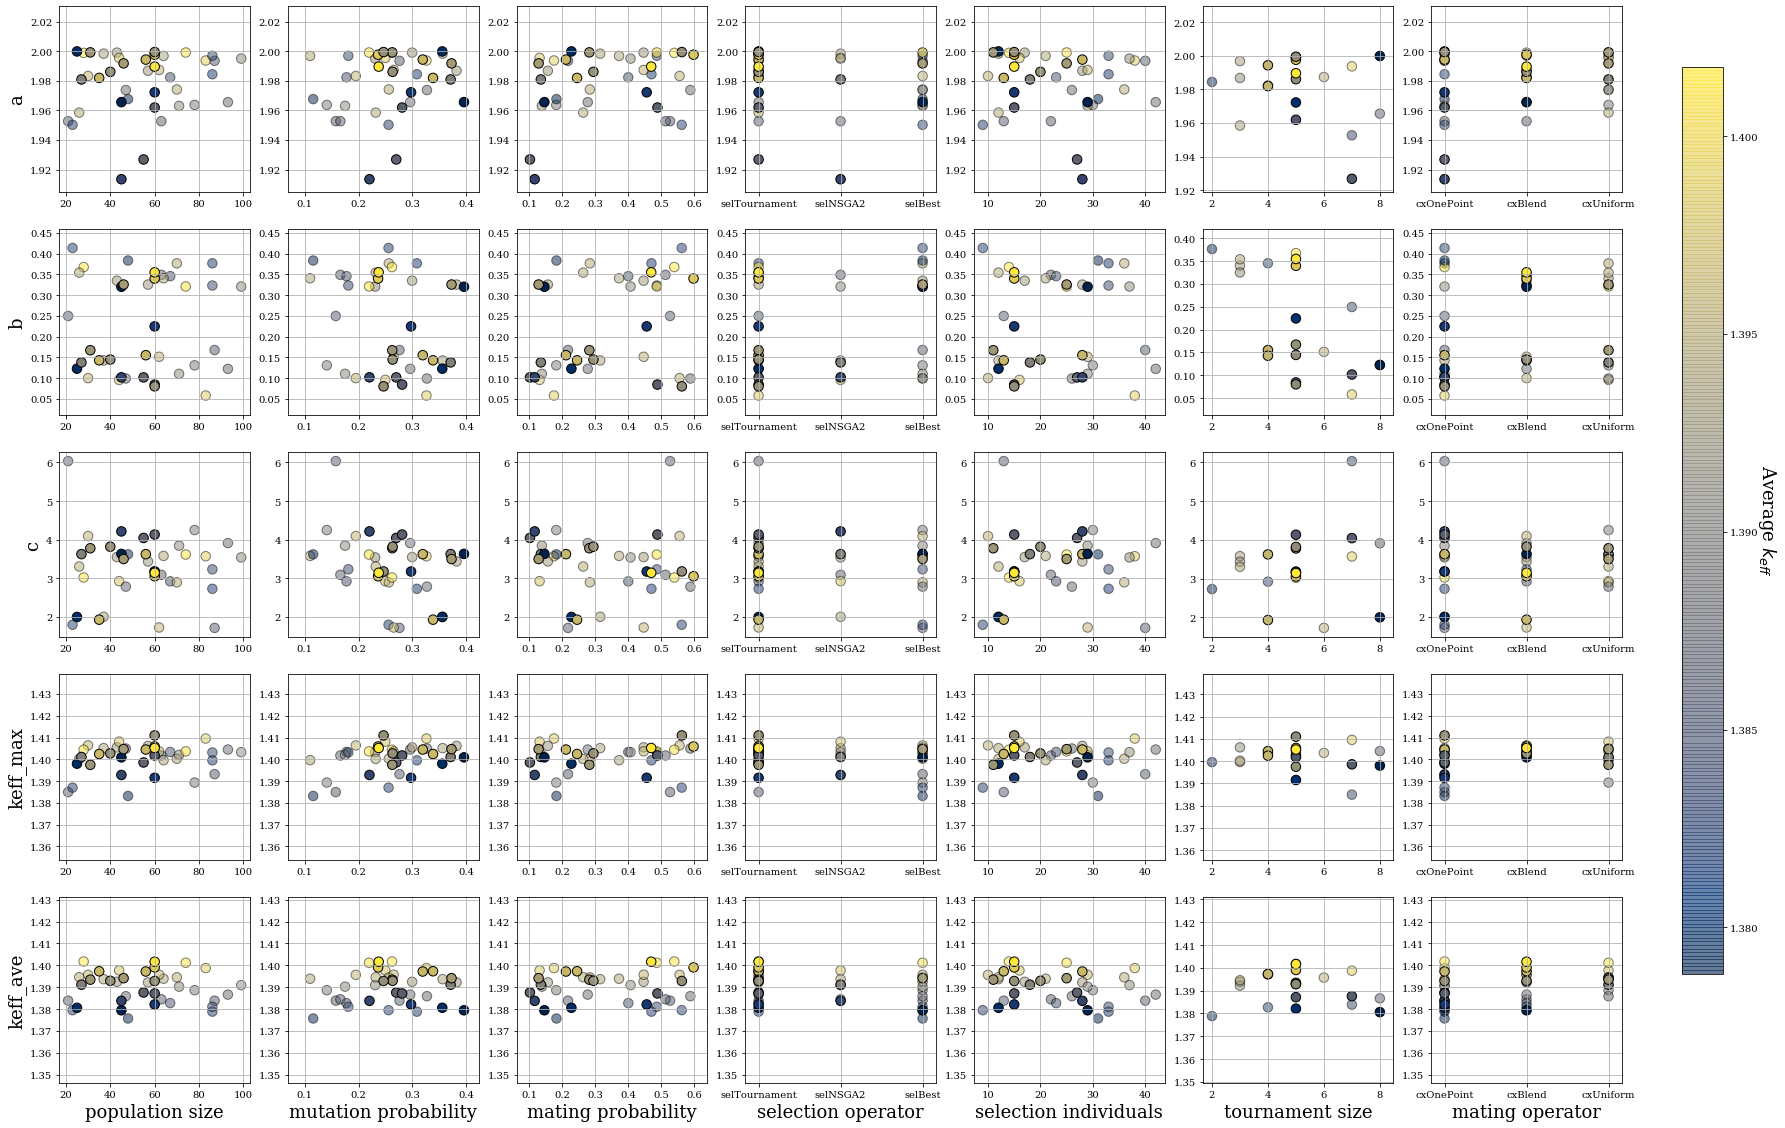

In [19]:
hyperparameters = ["pop_size", "mut_prob", "mate_prob", "select_op", "k", "tournsize", "mate_op"]
names = ["population size", "mutation probability", "mating probability", "selection operator", "selection individuals", "tournament size", "mating operator"]
inputs = ["a", "b", "c", "keff_max", "keff_ave"]
fig = plt.figure(figsize=(28, 28))
num = 0
for i, p in enumerate(inputs):
    for j, q in enumerate(hyperparameters):
        num += 1
        ax = fig.add_subplot(7,7,num)
        img = comparison2(q,p,ax)
        if j == 0:
            ax.set_ylabel(p,fontsize=18)
        if i == len(inputs) - 1: 
            ax.set_xlabel(names[j], fontsize=18)
cbar_ax = fig.add_axes([0.93, 0.4, 0.02, 0.45])
cbar = fig.colorbar(img, cax=cbar_ax)
cbar.ax.set_ylabel('Average $k_{eff}$', rotation=270, fontsize=18)
cbar.ax.get_yaxis().labelpad = 20
fig.savefig('input_hyperparameters_sens.png',bbox_inches='tight', dpi=300)